In [2]:
a.shape

(782630, 384)

In [28]:
import h5py
import cuml
import os
import gc
import matplotlib.pyplot as plt
import numpy as np
import sklearn
import os



def load_vectors(file_path, dataset_name):
    with h5py.File(file_path, 'r') as file:
        vectors = np.array(file[dataset_name])
    return vectors[:100000]

# total 7.9 millions
original_file = '../output/testing_pipeline/embeddings/embeddings.h5'
original_dataset_name = 'embeddings'

reduced_files_directory = '../output/testing_pipeline/test'
reduced_dataset_name = "umap_coordinates"

original_vectors = load_vectors(original_file, original_dataset_name)

In [29]:
trustworthiness_scores = {}
os.environ['CUDA_VISIBLE_DEVICES'] = '1'

for file_path in os.listdir(reduced_files_directory):
    file_path = os.path.join(reduced_files_directory, file_path)
    reduced_vectors = load_vectors(file_path, reduced_dataset_name)
    tw = cuml.metrics.trustworthiness(original_vectors, reduced_vectors, n_neighbors=50)
    trustworthiness_scores[file_path] = tw
    print(f'Trustworthiness for {file_path}: {tw}')

    # clean gpu
    del reduced_vectors
    gc.collect()

Trustworthiness for ../output/testing_pipeline/test/dimensional_reduction.h5: 0.49996927883351927


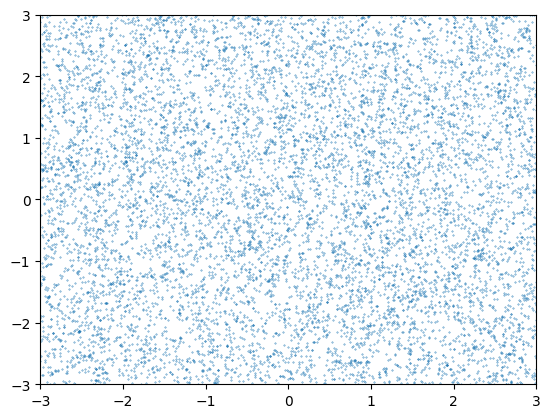

In [17]:
reduced_01 = load_vectors('../output/testing_pipeline/subset_umap_2/subset_0.2.h5', 'umap_coordinates')

# plot the reduced vectors
plt.scatter(reduced_01[:, 0], reduced_01[:, 1], s=0.1)

# show only from -10 to 10
limit = 3
plt.xlim(-limit, limit)
plt.ylim(-limit, limit)

plt.show()

In [1]:
# reload libraries

%load_ext autoreload
%autoreload 2

In [3]:
import os
import sys
sys.path.append('../')
import config
from src.embed_dataset import fetch_data_in_batches, prepare_texts


for batch in fetch_data_in_batches(config.TABLE_NAME, config.MODEL_BATCH_SIZE):
    texts = prepare_texts(batch)
    break

texts

/media/data/stviel/RedditPolarization/output/testing_pipeline/app.log


['/u/waterguy12 should be made a moderator. Just like KenM himself is a moderator of /r/KenM, /u/waterguy12 should be made a moderator of this fine subreddit to ensure the preservation of quality, canon lore upon his return.',
 'Where did the Cato Sicarius meme come from? Sometimes I\'ll see a reply that starts with "I, Cato Sicarius" and is typed nobly. Where does this come from?',
 "I feel like I dont belong anywhere it seems like no matter I go and no matter what I do I am rejected,even online,idk if because there are too many people already or if i''m a guy but no matter how hard I try I cant change that.",
 "Is Marlborough Park NE safe? I'vde heard several houses in NE got broken into and a lot of car got windows smashed. I've just moved to Calgary for 3 weeks. I don't know much about Calgary. Thanks! Edited : sorry i meant i just got here 3 weeks ago, but plan to live here permanently ",
 "Story Sunday: Witnessed an accidental compound dry fire today. I had an interesting experie

In [24]:
from cuml.manifold import UMAP

a = np.random.rand(100, 50)
b = np.random.rand(1000, 50)

local_model = UMAP(
        n_neighbors=3,
        n_components=5,
        min_dist=0.01,
    )

local_model.fit(a)
local_model.transform(b).shape


(1000, 5)